# MoI ML CNN Experiment

- Train op fashion mnist
- Laat experimenten zien: kies 2 - 3 params, kies een range en voer tests uit. Doel is 93% accuracy.

Trainen kan niet in dit notebook vanwege het grote aantal combinaties. Het gebeurt in een afzonderlijk bestand "matthijs.py". Het resultaat is opgeslagen in "matthijs.csv".

## Resultaten

Voor elke configuratie hier de uiteindelijke accuracy en het aantal parameters.

In [24]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv("../matthijs.orig.csv")
df.sort_values('accuracy', ascending=False)


,accuracy,num_params,c1_ksize,c1_stride,c2_ksize,c2_stride,num_filters,config_num,config_label
38,1.00000,154410,2,1,1,1,64,38,"Config: 2/1, 1/1 flt #64"
48,0.96875,30474,2,1,3,1,16,48,"Config: 2/1, 3/1 flt #16"
52,0.96875,30314,2,1,3,2,32,52,"Config: 2/1, 3/2 flt #32"
72,0.96875,39770,3,1,1,1,16,72,"Config: 3/1, 1/1 flt #16"
83,0.96875,56426,3,1,2,2,64,83,"Config: 3/1, 2/2 flt #64"
...,...,...,...,...,...,...,...,...,...
23,0.65625,23146,1,2,1,2,64,23,"Config: 1/2, 1/2 flt #64"
18,0.65625,11994,1,2,1,1,16,18,"Config: 1/2, 1/1 flt #16"
21,0.65625,6874,1,2,1,2,16,21,"Config: 1/2, 1/2 flt #16"
27,0.59375,4570,1,2,2,2,16,27,"Config: 1/2, 2/2 flt #16"


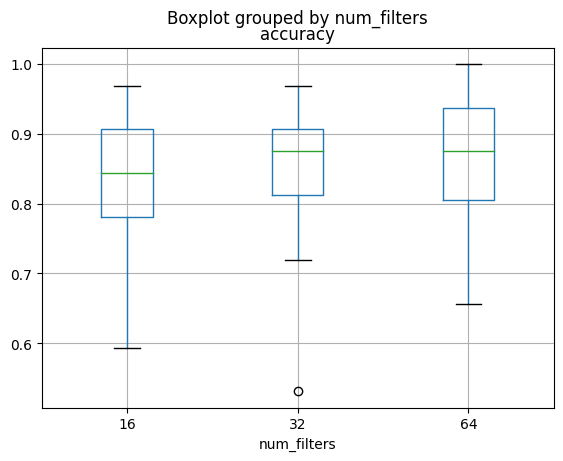

In [19]:
ax = df.boxplot('accuracy', 'num_filters')

<AxesSubplot: title={'center': 'accuracy'}, xlabel='c1_ksize'>

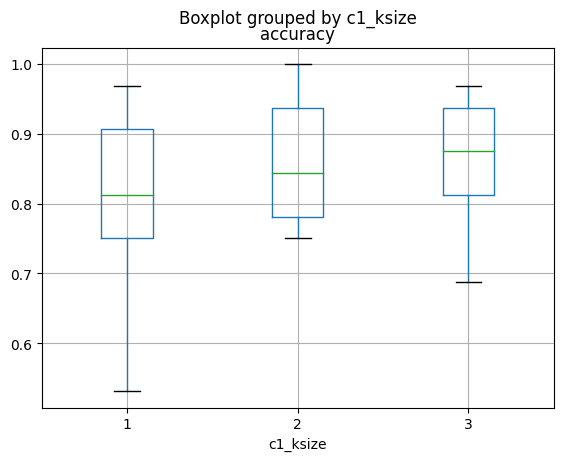

In [21]:
df.boxplot('accuracy', 'c1_ksize')
# df['']

<AxesSubplot: title={'center': 'accuracy'}, xlabel='c2_ksize'>

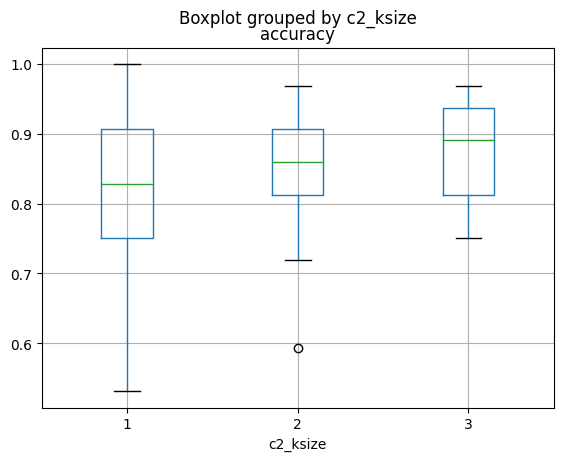

In [22]:
df.boxplot('accuracy', 'c2_ksize')

De resultaten suggereren: grotere kernels zijn beter, meer filters ook, maar er is wel veel overlap.

Wellicht speelt stride een rol?

<AxesSubplot: title={'center': 'accuracy'}, xlabel='c1_stride'>

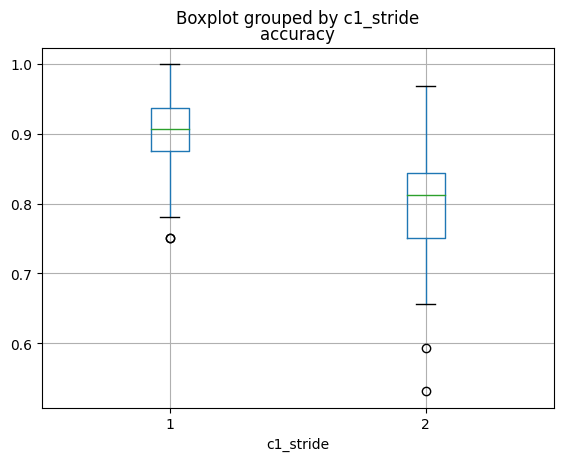

In [25]:
df.boxplot('accuracy', 'c1_stride')

<AxesSubplot: title={'center': 'accuracy'}, xlabel='c2_stride'>

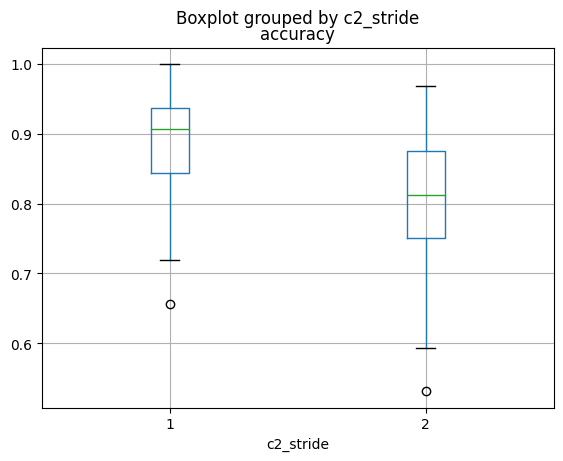

In [26]:
df.boxplot('accuracy', 'c2_stride')

Nou en of. Vooral c1 stride zorgt voor duidelijke verschillen.

Eens kijken wat de combinatie van c1 stride en c1 kernel size oplevert

<AxesSubplot: title={'center': 'accuracy'}, xlabel='c1_ksize_stride'>

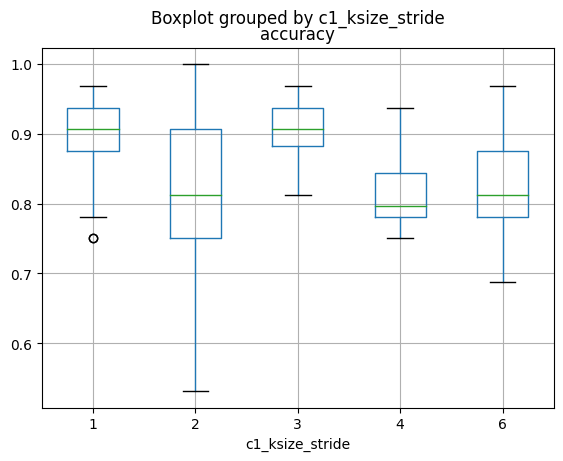

In [28]:
df['c1_ksize_stride'] = df['c1_ksize'] * df['c1_stride']
df.boxplot('accuracy', 'c1_ksize_stride')

Dat gaat alle kanten op. Misschien eens filteren per stride?

In [31]:
df_c1_stride1 = df[df['c1_stride'] == 1]
df_c1_stride2 = df[df['c1_stride'] == 2]
df_c1_stride3 = df[df['c1_stride'] == 3]

<AxesSubplot: title={'center': 'accuracy'}, xlabel='c1_ksize'>

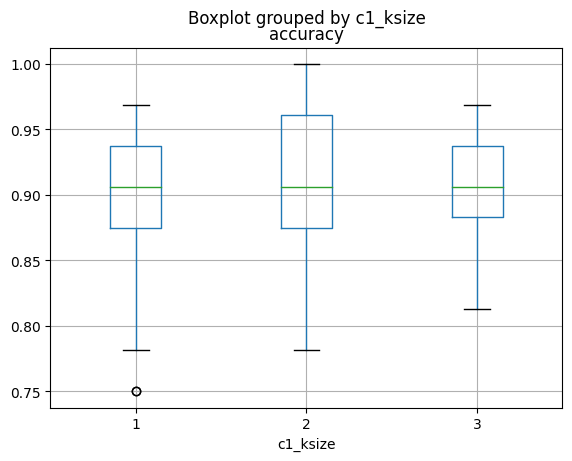

In [32]:
df_c1_stride1.boxplot('accuracy', 'c1_ksize')